In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kabanjahe id
marogong ph
vao nc
kudymkar ru
saskylakh ru
rikitea pf
palmer us
vaini to
jumla np
buala sb
hobart au
hermanus za
lagoa pt
horsham au
nizhneyansk ru
mahebourg mu
bluff nz
tautira pf
sakakah sa
puerto ayora ec
sisimiut gl
alofi nu
mar del plata ar
bluff nz
castro cl
dzhebariki-khaya ru
souillac mu
melo uy
muros es
saint-philippe re
cherskiy ru
barentsburg sj
bluff nz
mataura pf
umzimvubu za
saint george bm
butaritari ki
emba kz
evensk ru
bluff nz
severo-kurilsk ru
doha kw
lebu cl
whitehorse ca
charters towers au
walvis bay na
rikitea pf
marrakesh ma
saint-francois gp
kodiak us
chuguyevka ru
lolua tv
chokurdakh ru
rikitea pf
maloshuyka ru
saint-augustin ca
punta arenas cl
vao nc
taolanaro mg
yellowknife ca
ushuaia ar
kapaa us
vanavara ru
norman wells ca
maurawan in
grand river south east mu
port elizabeth za
batagay-alyta ru
xiaoshi cn
vaini to
asau tv
hobart au
san patricio mx
sofiysk ru
qaanaaq gl
thompson ca
hobyo so
rikitea pf
alofi nu
kapaa us
barrow us
axim gh
coruripe

urumqi cn
rio gallegos ar
kodiak us
mataura pf
saskylakh ru
bredasdorp za
baykalovo ru
hithadhoo mv
airai pw
nhulunbuy au
albany au
rikitea pf
arraial do cabo br
mwense zm
westpunt an
baherden tm
thompson ca
liku wf
saldanha za
fulitun cn
chuy uy
thompson ca
ler sd
albany au
mataura pf
jamestown sh
dawei mm
rikitea pf
hasaki jp
padang id
omagh gb
ushuaia ar
barrow us
rikitea pf
ugoofaaru mv
tuktoyaktuk ca
carnarvon au
ijaki ki
bauchi ng
beyneu kz
pemangkat id
clinton us
saint george bm
barrow us
bredasdorp za
port alfred za
zvishavane zw
butaritari ki
te anau nz
cape town za
mataura pf
bandarbeyla so
hobart au
victoria sc
khatanga ru
kapaa us
bowling green us
nikolskoye ru
sorland no
chicama pe
kaitangata nz
baghdad iq
codrington ag
upernavik gl
mahadday weyne so
pacific grove us
taguatinga br
port alfred za
bardiyah ly
hobart au
teya ru
esperance au
syamzha ru
kormilovka ru
port elizabeth za
manakara mg
kapaa us
sao jose da coroa grande br
bluff nz
itarema br
rikitea pf
castro cl
balk

ixtapa mx
sur om
talara pe
cockburn town bs
samusu ws
mataura pf
fortuna us
hasaki jp
qaanaaq gl
rikitea pf
rikitea pf
karratha au
ostrovnoy ru
saskylakh ru
matara lk
rikitea pf
cape town za
kapaa us
clyde river ca
isangel vu
naze jp
busselton au
vaini to
puerto ayora ec
jizan sa
lebu cl
kapaa us
dudinka ru
muli mv
ushuaia ar
san quintin mx
cidreira br
vestmannaeyjar is
sambava mg
yellowknife ca
jingdezhen cn
iralaya hn
pundaguitan ph
new norfolk au
busselton au
punta arenas cl
petropavlovsk-kamchatskiy ru
urumqi cn
ranong th
mataura pf
severo-kurilsk ru
port elizabeth za
taolanaro mg
grindavik is
port alfred za
cape town za
kousseri cm
tasiilaq gl
victoria sc
east london za
vaini to
atar mr
motygino ru
taolanaro mg
ponta do sol cv
lebu cl
khatanga ru
surgut ru
whitehorse ca
marcona pe
belyy yar ru
mount isa au
srednekolymsk ru
nisia floresta br
gushikawa jp
port elizabeth za
arraial do cabo br
ilulissat gl
harper lr
churapcha ru
jamestown sh
alihe cn
new norfolk au
maningrida au
rikit

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d3a3ef01ce0376b796dbf9584f6c4358


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kabanjahe
Processing Record 2 of Set 1 | marogong
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | kudymkar
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | palmer
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | jumla
Processing Record 10 of Set 1 | buala
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | lagoa
Processing Record 14 of Set 1 | horsham
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | tautira
Processing Record 19 of Set 1 | sakakah
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1 | mar del 

Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | biak
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | riyadh
Processing Record 41 of Set 4 | coahuayana
Processing Record 42 of Set 4 | dauriya
Processing Record 43 of Set 4 | kamenka
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | banjar
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | lazaro cardenas
Processing Record 1 of Set 5 | atuona
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | torrington
Processing Record 4 of Set 5 | dagatan
Processing Record 5 of Set 5 | warqla
City not found. Skipping...
Processing Record 6 of Set 5 | ladysmith
Processing Record 7 of Set 5 | cotacachi
Processing Record 8 of Set 5 | praya
Processing Record 9 of Set 5 | sola
Processing Rec

Processing Record 25 of Set 8 | balkhash
Processing Record 26 of Set 8 | solnechnyy
Processing Record 27 of Set 8 | vero beach
Processing Record 28 of Set 8 | bolshevik
Processing Record 29 of Set 8 | jhawarian
Processing Record 30 of Set 8 | jasper
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | sumenep
Processing Record 34 of Set 8 | haywards heath
Processing Record 35 of Set 8 | kutum
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | bacuit
City not found. Skipping...
Processing Record 39 of Set 8 | manzhouli
Processing Record 40 of Set 8 | labuhan
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | utiroa
City not found. Skipping...
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | innisfail
Processing Record 46 of Set 8 | rocha
Processing Record 47 of Set 8 | pi

Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | talara
Processing Record 16 of Set 12 | cockburn town
Processing Record 17 of Set 12 | karratha
Processing Record 18 of Set 12 | matara
Processing Record 19 of Set 12 | naze
Processing Record 20 of Set 12 | jizan
Processing Record 21 of Set 12 | dudinka
Processing Record 22 of Set 12 | muli
Processing Record 23 of Set 12 | san quintin
Processing Record 24 of Set 12 | jingdezhen
Processing Record 25 of Set 12 | iralaya
Processing Record 26 of Set 12 | pundaguitan
Processing Record 27 of Set 12 | ranong
Processing Record 28 of Set 12 | kousseri
Processing Record 29 of Set 12 | atar
Processing Record 30 of Set 12 | motygino
Processing Record 31 of Set 12 | surgut
Processing Record 32 of Set 12 | marcona
City not found. Skipping...
Processing Record 33 of Set 12 | belyy yar
Processing Record 34 of Set 12 | mount isa
Processing Record 35 of Set 12 | nisia floresta
Processing Record 36 of Set 12 | gushikawa
Processing Re

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kabanjahe,3.10,98.49,62.74,95,100,1.16,ID,2020-08-27 20:58:54
1,Marogong,7.67,124.15,71.58,86,51,2.62,PH,2020-08-27 20:58:54
2,Vao,-22.67,167.48,67.44,71,81,18.90,NC,2020-08-27 20:58:54
3,Kudymkar,59.02,54.66,53.19,94,77,1.79,RU,2020-08-27 20:58:54
4,Saskylakh,71.92,114.08,49.51,71,60,1.32,RU,2020-08-27 20:58:54
5,Rikitea,-23.12,-134.97,68.00,61,0,2.33,PF,2020-08-27 20:58:54
6,Palmer,42.16,-72.33,64.40,100,90,5.82,US,2020-08-27 20:58:54
7,Vaini,-21.20,-175.20,75.20,78,20,6.93,TO,2020-08-27 20:58:54
8,Jumla,29.27,82.18,60.13,69,84,3.06,NP,2020-08-27 20:58:54
9,Buala,-8.14,159.59,81.86,79,100,11.61,SB,2020-08-27 20:58:54


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kabanjahe,ID,2020-08-27 20:58:54,3.10,98.49,62.74,95,100,1.16
1,Marogong,PH,2020-08-27 20:58:54,7.67,124.15,71.58,86,51,2.62
2,Vao,NC,2020-08-27 20:58:54,-22.67,167.48,67.44,71,81,18.90
3,Kudymkar,RU,2020-08-27 20:58:54,59.02,54.66,53.19,94,77,1.79
4,Saskylakh,RU,2020-08-27 20:58:54,71.92,114.08,49.51,71,60,1.32
5,Rikitea,PF,2020-08-27 20:58:54,-23.12,-134.97,68.00,61,0,2.33
6,Palmer,US,2020-08-27 20:58:54,42.16,-72.33,64.40,100,90,5.82
7,Vaini,TO,2020-08-27 20:58:54,-21.20,-175.20,75.20,78,20,6.93
8,Jumla,NP,2020-08-27 20:58:54,29.27,82.18,60.13,69,84,3.06
9,Buala,SB,2020-08-27 20:58:54,-8.14,159.59,81.86,79,100,11.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# API Practice Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/27/20'

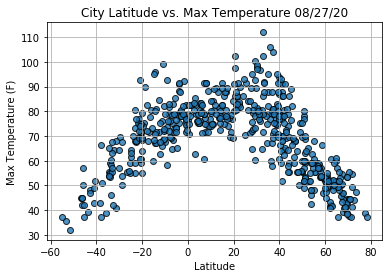

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

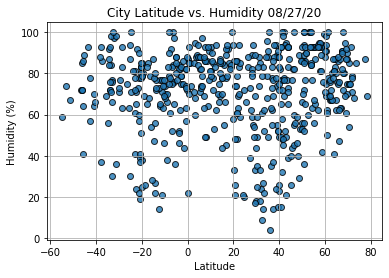

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

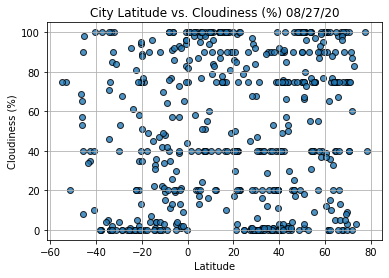

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

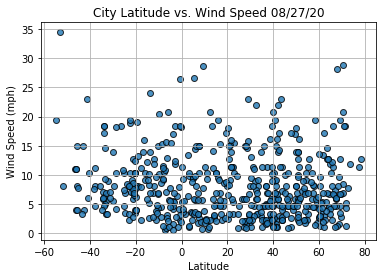

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()